<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/desafio_guiado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
#Librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
from sklearn.metrics  import r2_score , median_absolute_error,mean_squared_error
import graphviz
import pickle

**preparacion de datos**

In [ ]:
df=pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')
df.info()

In [52]:
vartype=[df[i].name if df[i].dtype=='object' else ''  for i in df.columns ]
sel=np.where([vartype[i] != '' for i in range(0,len(vartype))])[0].tolist()
vartype=[vartype[i] for i in sel]
hold_dummies=[]
for i in vartype:
  hold_dummies.append(pd.get_dummies(pd.get_dummies(df[i],prefix=df[i].name,prefix_sep='_',drop_first=True,dummy_na=False)))
df=pd.concat([df,pd.concat(hold_dummies,axis=1)],axis=1)
df=df.drop(columns=vartype)

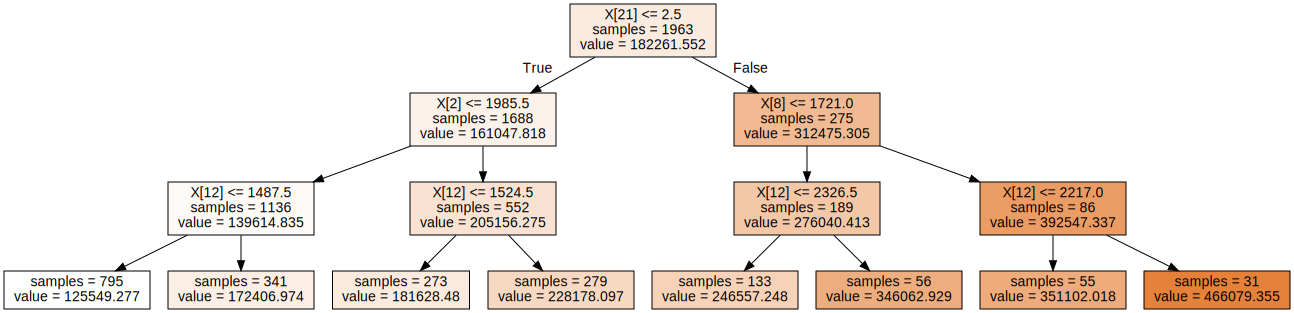

In [100]:
target=df['Sale_Price']
atributos=df.drop(columns=['Sale_Price'])
X_train,X_test,y_train,y_test=train_test_split(atributos,target,test_size=0.33,random_state=11238)
#ARBOL
arbol=DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
export_graphviz(arbol, out_file='tree.dot',impurity=False,filled=True)
with open('tree.dot') as f:
  dot_graph =f.read()
graphviz.Source(dot_graph)

In [101]:
fit_model=arbol.predict(X_test)
r2_score(y_test,fit_model)

0.6300292495177116

guardamos modelo y variables

In [68]:
pickle.dump(arbol,open('arbol.sav','wb'))
pickle.dump(X_train,open('arbol_Xtr.sav','wb'))
pickle.dump(X_test,open('arbol_Xts.sav','wb'))
pickle.dump(y_train,open('arbol_ytr.sav','wb'))
pickle.dump(y_test,open('arbol_yts.sav','wb'))

In [94]:
relevancia=pd.DataFrame(arbol.feature_importances_,columns=['importancia'])
relevancia['caracteristica']=X_train.columns.values.tolist()
relevancia.sort_values('importancia',  ascending=False).iloc[0:10]

,importancia,caracteristica
21,0.411364,Garage_Cars
2,0.146836,Year_Built
12,0.136711,Gr_Liv_Area
8,0.098537,Total_Bsmt_SF
9,0.024477,First_Flr_SF
23,0.020373,Wood_Deck_SF
255,0.015469,Fireplace_Qu_No_Fireplace
1,0.012132,Lot_Area
10,0.009929,Second_Flr_SF
22,0.009129,Garage_Area


** Evaluado **

In [108]:
randomforest=RandomForestRegressor(random_state=11238,n_estimators=100).fit(X_train,y_train)
fit_model=randomforest.predict(X_test)
r2_score(y_test,fit_model)

0.8680114293881822